## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [6]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

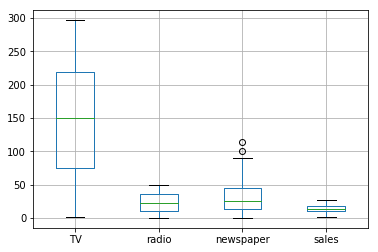

In [7]:
df.boxplot()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

C:\Users\Dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C6274E0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C966A90>]], dtype=object)

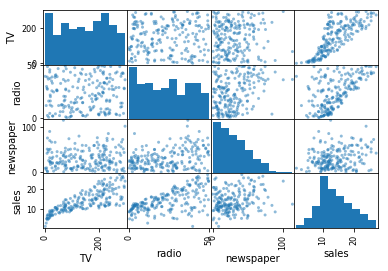

In [10]:
scatter_matrix(df)

In [9]:
from pandas.tools.plotting import scatter_matrix 

Text(0,0.5,'sales')

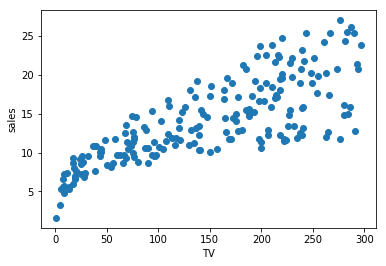

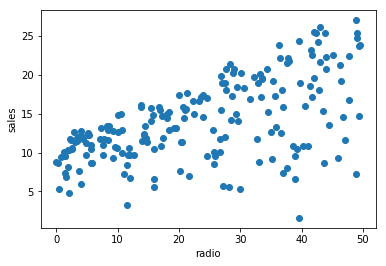

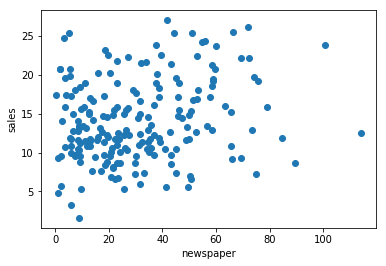

In [14]:
plt.figure()
plt.scatter(df.loc[:,'TV'], df.loc[:,'sales'])
plt.xlabel('TV')
plt.ylabel('sales')

plt.figure()
plt.scatter(df.loc[:,'radio'], df.loc[:,'sales'])
plt.xlabel('radio')
plt.ylabel('sales')

plt.figure()
plt.scatter(df.loc[:,'newspaper'], df.loc[:,'sales'])
plt.xlabel('newspaper')
plt.ylabel('sales')

Which of the variables seem correlated with one another? Which don't? Explain your answer

In [17]:
print('TV and sales seem more hightly correlated than the other pairs, with a positive linear trend.')

TV and sales seem more hightly correlated than the other pairs, with a positive linear trend.


### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [26]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [19]:
y = df['sales']
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
6       7.2
7      11.8
8      13.2
9       4.8
10     10.6
11      8.6
12     17.4
13      9.2
14      9.7
15     19.0
16     22.4
17     12.5
18     24.4
19     11.3
20     14.6
21     18.0
22     12.5
23      5.6
24     15.5
25      9.7
26     12.0
27     15.0
28     15.9
29     18.9
30     10.5
       ... 
171     8.4
172    14.5
173     7.6
174    11.7
175    11.5
176    27.0
177    20.2
178    11.7
179    11.8
180    12.6
181    10.5
182    12.2
183     8.7
184    26.2
185    17.6
186    22.6
187    10.3
188    17.3
189    15.9
190     6.7
191    10.8
192     9.9
193     5.9
194    19.6
195    17.3
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64

b) Set X to be just the features described above in df

In [24]:
X = pd.DataFrame ({'TV':df['TV'], 'radio':df['radio'], 'newspaper':df['newspaper']})
X

,TV,newspaper,radio
1,230.1,69.2,37.8
2,44.5,45.1,39.3
3,17.2,69.3,45.9
4,151.5,58.5,41.3
5,180.8,58.4,10.8
6,8.7,75.0,48.9
7,57.5,23.5,32.8
8,120.2,11.6,19.6
9,8.6,1.0,2.1
10,199.8,21.2,2.6


c) Randomly split data into training and testing - 80% training, 20% testing.

In [46]:
import numpy as np
from sklearn.model_selection import train_test_split

#random splitting

(X_train, X_test, y_train, y_test) = train_test_split (X, y, test_size=0.2)



d) Train model on training data, and make predictions on testing data

In [52]:
#linear regression
regr = LinearRegression()
regr.fit(X_train, y_train)

print ('Coefficients: \n', regr.coef_)
print ('Residual sum of squares = %.2f' % np.mean(regr.predict(X_test) - y_test)**2)



Coefficients: 
 [ 0.04498141  0.00028788  0.19220959]
Residual sum of squares = 0.04


e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [51]:
print ('Variance score = %.2f' % regr.score(X_test, y_test))

Variance score = 0.89


f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

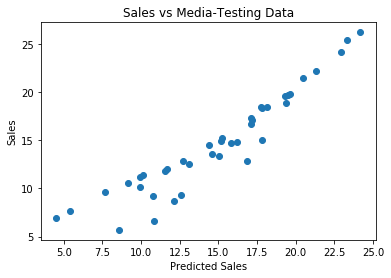

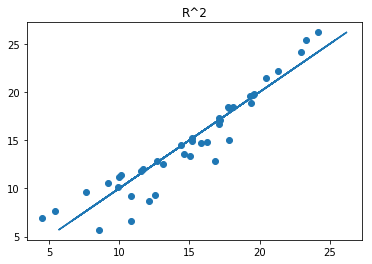

In [60]:
#plotting predicted values of testing set vs real values
plt.figure()
plt.title('Sales vs Media-Testing Data')
plt.scatter(regr.predict(X_test), y_test, label='Test')
plt.xlabel('Predicted Sales')
plt.ylabel('Sales')

#drawing regression line
plt.figure()
plt.title('R^2')
plt.scatter(regr.predict(X_test), y_test)
plt.plot (y_test, y_test)

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [61]:
print ('The coefficients of each feature is the weight a feature influences the predictive model.')
print ('The relatively low score from newspaper suggests it is a feature that can be removed. ')

The coefficients of each feature is the weight a feature influences the predictive model.
The relatively low score from newspaper suggests it is a feature that can be removed. 


h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

Coefficients: 
 [ 0.04655483  0.18906546]
Residual sum of squares = 0.23
Variance score = 0.92


Text(0.5,0,'Sales')

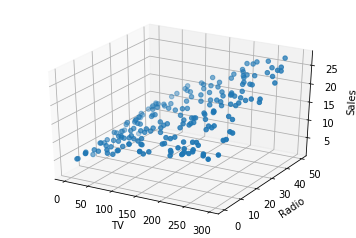

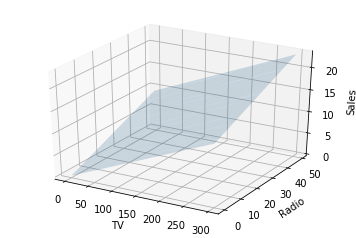

In [104]:
X2 = pd.DataFrame ({'TV':df['TV'], 'radio':df['radio']})


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


#plotting scatter with axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter (X2['TV'], X2['radio'], y, zdir ='z')
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

(X2_train, X2_test, y2_train, y2_test) = train_test_split (X2, y, test_size=0.2)
regr = LinearRegression()
regr.fit(X2_train, y2_train)

print ('Coefficients: \n', regr.coef_)
print ('Residual sum of squares = %.2f' % np.mean(regr.predict(X2_test) - y2_test)**2)
print ('Variance score = %.2f' % regr.score(X2_test, y2_test))


#plotting surface hyperplane
c_tv = regr.coef_[0]
c_radio = regr.coef_[1]

normal = [c_tv, c_radio, -1]
xx, yy = np.meshgrid(range(300), range (50))
                     
z = (-normal[0]*xx - normal[1]*yy)*1./normal[2]

plt3d = plt.figure().gca(projection ='3d')
plt3d.plot_surface(xx,yy,z,alpha=0.2)
plt3d.set_xlabel('TV')
plt3d.set_ylabel('Radio')
plt3d.set_zlabel('Sales')

Coefficients: 
 [ 0.04512219  0.18874221]
Residual sum of squares = 0.08
Variance score = 0.91


Text(0.5,0,'Sales')

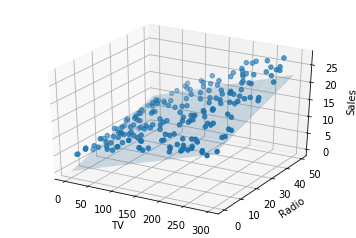

In [110]:
X2 = pd.DataFrame ({'TV':df['TV'], 'radio':df['radio']})


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


(X2_train, X2_test, y2_train, y2_test) = train_test_split (X2, y, test_size=0.2)
regr = LinearRegression()
regr.fit(X2_train, y2_train)

print ('Coefficients: \n', regr.coef_)
print ('Residual sum of squares = %.2f' % np.mean(regr.predict(X2_test) - y2_test)**2)
print ('Variance score = %.2f' % regr.score(X2_test, y2_test))


#set up normal vector for hyperplane
c_tv = regr.coef_[0]
c_radio = regr.coef_[1]

normal = [c_tv, c_radio, -1]
xx, yy = np.meshgrid(range(300), range (50))

#set up z coordinates
z = (-normal[0]*xx - normal[1]*yy)*1./normal[2]

#set up 3D plot
plt3d = plt.figure().gca(projection ='3d')

#plot surface
plt3d.plot_surface(xx,yy,z,alpha=0.2)

#plot scatter
plt3d.scatter (X2['TV'], X2['radio'], y, zdir ='z')

plt3d.set_xlabel('TV')
plt3d.set_ylabel('Radio')
plt3d.set_zlabel('Sales')


## Problem 3:  Gradient Descent and the learning rate

In [90]:
regr.coef_ [0]

0.045545885651978507

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

In [63]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Running..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

SyntaxError: invalid syntax (<ipython-input-63-9574d07616dc>, line 39)

In [48]:
# Use this to visually discuss convergence rate based on learning rate

#for num in range(0,10):
#    run(num)
#    plt.show()


## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.